In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## ВАХ разряда

In [107]:
df1 = pd.read_excel('table1.xlsx')
df1.head()

,I,U,eI,eU
0,1.63,26.0,0.00489,0.0780
1,1.81,25.1,0.00543,0.0753
2,2.00,25.0,0.00600,0.0750
3,2.22,23.7,0.00666,0.0711
4,2.40,22.5,0.00720,0.0675


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


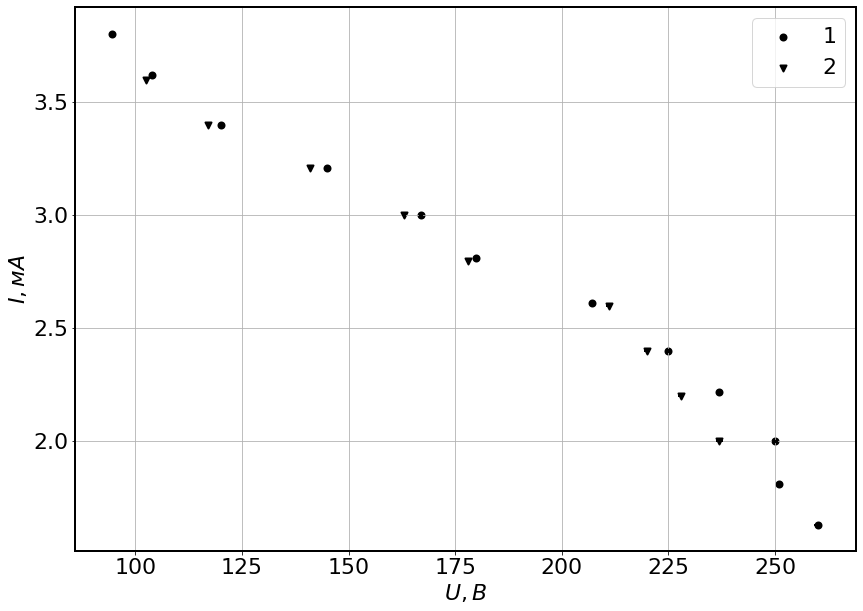

In [119]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(10*df1.U[:12], df1.I[:12], linewidth=2, c='black', marker='o', label='1')
ax.scatter(10*df1.U[12:], df1.I[12:], linewidth=2, c='black', marker='v', label='2')

ax.errorbar(df1.U*10, df1.I, xerr = df1.eU*10, yerr = df1.eI, fmt='none', linewidth=2, c='black')
ax.legend()

ax.set_ylabel(r"$I, мА$")
ax.set_xlabel(r"$U, В$")
fig.savefig(r'images/UpIp.eps', format='eps')

### Зондовые харастеристики

In [109]:
df2 = pd.read_excel('table2.xlsx')
df2.head()

,I,U,eI,eU
0,52.36,25.00,0.15708,0.07500
1,52.70,22.00,0.15810,0.06600
2,53.20,19.00,0.15960,0.05700
3,53.53,16.00,0.16059,0.04800
4,54.10,13.05,0.16230,0.03915


In [110]:
df3 = pd.read_excel('table3.xlsx')
df3.head()

,I,U,eI,eU
0,41.4,25.0,0.1242,0.075
1,41.4,22.0,0.1242,0.066
2,41.8,19.0,0.1254,0.057
3,42.0,16.0,0.1260,0.048
4,42.3,13.0,0.1269,0.039


In [111]:
df4 = pd.read_excel('table4.xlsx')
df4

,I,U,eI,eU
0,32.40,25.00,0.09720,0.07500
1,32.70,22.10,0.09810,0.06630
2,32.80,19.10,0.09840,0.05730
3,32.80,16.00,0.09840,0.04800
4,33.00,13.00,0.09900,0.03900
5,33.20,10.20,0.09960,0.03060
6,33.80,8.10,0.10140,0.02430
7,35.00,6.10,0.10500,0.01830
8,38.40,4.10,0.11520,0.01230
9,44.20,2.00,0.13260,0.00600


In [134]:
from scipy.optimize import curve_fit
def func(x, I, gamma, A):
    return I * np.tanh(x / 2 / gamma) + A*x

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


I, gamma, A
[ 6.38545087e+01  2.96201749e+00 -4.39780646e-02]
2.1029118661885455 0.12952197709939114 0.10561590912976308
[3.69480713e+01 2.50093003e+00 3.66204788e-02]
1.0864114995231757 0.11424730488223787 0.05729860534175674
[19.93756809  2.16160075  0.02632552]
0.4665231500774315 0.08909839747152855 0.025566248370555524


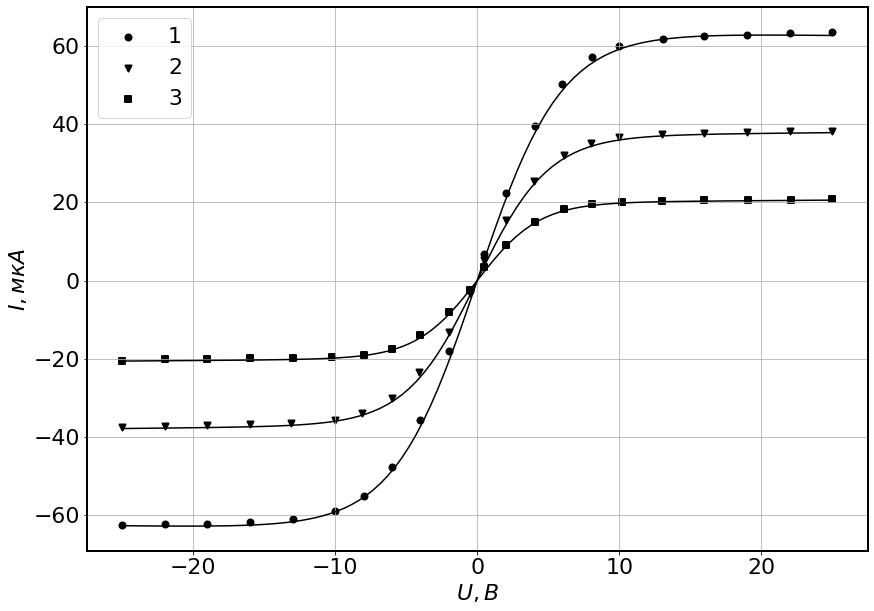

In [135]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

print("I, gamma, A")
q = 58 # константа подгона
ax.scatter(df2.U[:11], -df2.I[:11] + 2 * q, linewidth=2, c='black', marker='o', label='1')
ax.scatter(df2.U[11:], df2.I[11:] - 2 * q, linewidth=2, c='black', marker='o')

X = np.linspace(-25, 25, 100)
popt1, pcov1 = curve_fit(func, df2.U.values, np.concatenate(((-df2.I[:11] + 2 * q).values, (df2.I[11:] - 2 * q).values)))
print(popt1)
print(np.sqrt(pcov1[0][0]), np.sqrt(pcov1[1][1]), np.sqrt(pcov1[2][2]))
plt.plot(X, func(X, popt1[0], popt1[1], popt1[2]), c='black')

q = 39.9
ax.scatter(df3.U[:11], -df3.I[:11] + 2 * q, linewidth=2, c='black', marker='v', label='2')
ax.scatter(df3.U[11:], df3.I[11:] - 2 * q, linewidth=2, c='black', marker='v')

X = np.linspace(-25, 25, 100)
popt1, pcov1 = curve_fit(func, df3.U.values, np.concatenate(((-df3.I[:11] + 2 * q).values, (df3.I[11:] - 2 * q).values)))
print(popt1)
print(np.sqrt(pcov1[0][0]), np.sqrt(pcov1[1][1]), np.sqrt(pcov1[2][2]))
plt.plot(X, func(X, popt1[0], popt1[1], popt1[2]), c='black')

q = 26.7
ax.scatter(df4.U[:11], -df4.I[:11] + 2 * q, linewidth=2, c='black', marker='s', label='3')
ax.scatter(df4.U[11:], df4.I[11:] - 2 * q, linewidth=2, c='black', marker='s')

X = np.linspace(-25, 25, 100)
popt1, pcov1 = curve_fit(func, df4.U.values, np.concatenate(((-df4.I[:11] + 2 * q).values, (df4.I[11:] - 2 * q).values)))
print(popt1)
print(np.sqrt(pcov1[0][0]), np.sqrt(pcov1[1][1]), np.sqrt(pcov1[2][2]))
plt.plot(X, func(X, popt1[0], popt1[1], popt1[2]), c='black')


ax.legend()

ax.set_ylabel(r"$I, мкА$")
ax.set_xlabel(r"$U, В$")
fig.savefig(r'images/UI_main.eps', format='eps')

In [ ]:
[ 6.38545305e+01  1.68803778e-01 -4.39790883e-02]
2.1028830486717682 0.0073812977090134905 0.10561475463697526
[3.69480724e+01 1.99925613e-01 3.66204279e-02]
1.0864327042467286 0.009133102492536072 0.0572994822796166
[19.9375664   0.2313101   0.02632561]
0.4665298804045733 0.009534562367062993 0.025566529039258507

In [ ]:
6.3854 * 10